Twitter Sentiments Analysis

In [7]:
import selenium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep
import getpass
pd.options.display.max_colwidth = 1000


In [8]:
my_user="naqeeb2710"
my_pass=getpass.getpass()


In [9]:
search_item="Manish Sisodia"

In [10]:
path="C:\Program Files\driver\chromedriver.exe"
driver=webdriver.Chrome(path)
driver.get("https://twitter.com/i/flow/login")
sleep(3)

C:\Users\naqee\AppData\Local\Temp\ipykernel_20860\1402160771.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)


In [11]:
user_id=driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.RETURN)

In [12]:
password=driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.RETURN)


Scrap Tweets

In [13]:
search_box=driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.RETURN)

In [14]:
all_tweets=set()
tweets=driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")

while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(3)
    tweets=driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>100:
        break

    

In [15]:
all_tweets=list(all_tweets)
all_tweets[0]

'Last I checked \n@lakshyarajmewar\n’s family were the real scions of Maharana Pratap. While on the other hand Manish Sisodia is simply defaming Maharana Pratap’s legacy to hide his ‘Kaale Kaarname.’'

Cleaning The Tweets

In [16]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naqee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naqee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df=pd.DataFrame(all_tweets,columns=["Tweets"])
df.head()

,Tweets
0,Last I checked \n@lakshyarajmewar\n’s family were the real scions of Maharana Pratap. While on the other hand Manish Sisodia is simply defaming Maharana Pratap’s legacy to hide his ‘Kaale Kaarname.’
1,Sanjay Singh PC on Sisodia. It's just fun to hear him speak. A total demolition of the desperate and idiotic BJP propaganda machine. \n\n#ManishSisodia #ModiFearsKejriwal #MakeIndiaNo1
2,Look Out Notice issued against Manish Sisodia. This will prevent Manish from Flying Abroad\n\nArrest is INEVITABLE.
3,"CBI inquiry on Dy. CM Manish Sisodia ji for making World Class Schools, but why blind devotees and Modi-Shah silent on making the condition of government schools in Himachal, Gujarat and Haryana from bad to worse?\n\n#ShikshaVirodhiBJP\n@AAPHaryana"
4,"Picture of the Day, India's best education minister Shri Manish Sisodia"


In [18]:
stp_words=stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
def clean_tweet(tweet): 
    cleanTweet=re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet=re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet=" ".join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet 


def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet>0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"


In [27]:
df['CleanTweets']=df['Tweets'].apply(clean_tweet)
df['Polarity']=df['CleanTweets'].apply(calPolarity)
df['Subjectivity']=df['CleanTweets'].apply(calSubjectivity)
df['Segmentation']=df['Polarity'].apply(segmentation)
df.head()
df.to_csv('Tweetss.csv')
df.shape

(101, 5)

Analysing And Visulaing The Data

In [29]:
df=pd.read_csv('Tweetss.csv')
df.pivot_table(index=['Segmentation'],aggfunc={'Segmentation':'count'})

,Segmentation
Segmentation,
negative,20
neutral,49
positive,32


In [30]:
#Top three positive Tweets
df.sort_values(by=['Polarity'],ascending=False).head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
4,4,"Picture of the Day, India's best education minister Shri Manish Sisodia","Picture Day, India's best education minister Shri Manish Sisodia",1.0,0.3,positive
85,85,"PM Modi,\n\nAAP MP \n@SanjayAzadSln\n just met The World's BEST Education Minister \n@msisodia\n at his residence.\n\nWhy does your CBI need a Lookout Notice?","PM Modi, AAP MP met The World's BEST Education Minister residence. Why CBI need Lookout Notice?",1.0,0.3,positive
27,27,Manish Sisodia has been given the certificate of the world's best education minister only by Kejriwal\n\nLol,Manish Sisodia given certificate world's best education minister Kejriwal Lol,0.9,0.5,positive


In [31]:
#Top three negative Tweets
df.sort_values(by=['Polarity'],ascending=True).head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
81,81,"@PMOIndia\n,\nCBI4SSR Two Years no results yet!\nSuch a shame,centre keep throwing CBI 4 nonsense like manish sisodia case whereas ths bunch of loosers r loaded wid pending cases like Jiah Khan,Sushant/Disha!\nIt's awful hw \n@BJP4India\n failed 2 deliver wat \n@INCIndia\n kept under rugs!",", CBI4SSR Two Years results yet! Such shame,centre keep throwing CBI 4 nonsense like manish sisodia case whereas ths bunch loosers r loaded wid pending cases like Jiah Khan,Sushant/Disha! It's awful hw failed 2 deliver wat kept rugs!",-0.541667,0.6,negative
77,77,"Dear \n@PMOIndia\n,\nCBI4SSR 2Years, no results yet!\nSuch a shame,centre keep throwing CBI 4 nonsense like manish sisodia case whereas ths bunch of loosers r loaded wid pending cases like Jiah Khan,Sushant/Disha!\nIt's awful hw \n@BJP4India\n failed 2 deliver wat \n@INCIndia\n kept under rugs!","Dear , CBI4SSR 2Years, results yet! Such shame,centre keep throwing CBI 4 nonsense like manish sisodia case whereas ths bunch loosers r loaded wid pending cases like Jiah Khan,Sushant/Disha! It's awful hw failed 2 deliver wat kept rugs!",-0.541667,0.6,negative
22,22,"CBI issues lookout circular for Manish Sisodia, Delhi Dy CM and Education Minister spreads fake narrative about same","CBI issues lookout circular Manish Sisodia, Delhi Dy CM Education Minister spreads fake narrative",-0.500000,1.0,negative


In [33]:
#Neutral Tweets
df[df.Polarity==0].head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
5,5,CBI denies issuing any look out notice against Manish Sisodia,CBI denies issuing look notice Manish Sisodia,0.0,0.0,neutral
6,6,"#Gujarat\n\nDelhi CM \n@ArvindKejriwal\n along with Delhi Deputy CM \n@msisodia\n will make a very important announcement in a Townhall Meeting in Himatnagar, tomorrow at 4 PM",", tomorrow 4 PM",0.0,0.0,neutral
8,8,Delhi Deputy Chief Minister Manish Sisodia (\n@msisodia\n) speaks to NDTV on liquor policy probe,Delhi Deputy Chief Minister Manish Sisodia ( ) speaks NDTV liquor policy probe,0.0,0.0,neutral


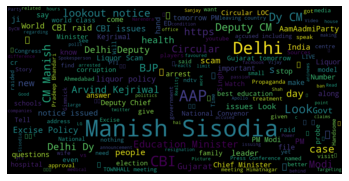

In [62]:
consolidated=' '.join(word for word in df['CleanTweets'])
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

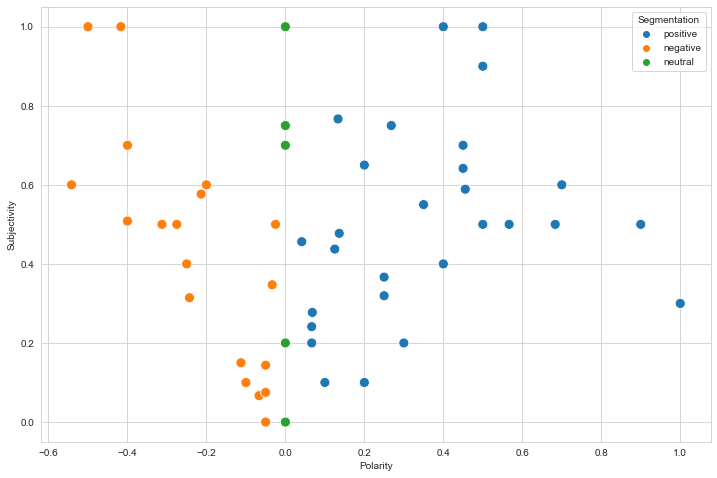

In [58]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x="Polarity",y="Subjectivity",data=df,s=100,hue="Segmentation",legend='full')

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

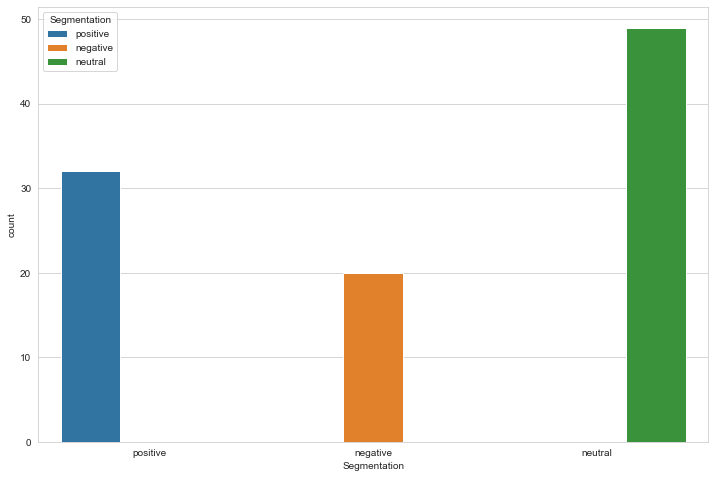

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(x='Segmentation',data=df,hue='Segmentation')

In [70]:
positive=round(len(df[df.Segmentation=='positive'])/len(df)*100,2)
negative=round(len(df[df.Segmentation=='negative'])/len(df)*100,2)
neutral=round(len(df[df.Segmentation=='neutral'])/len(df)*100,2)

result=[positive,negative,neutral]
pd.DataFrame(result,index=['Positive','Negative','Neutral'])

,0
Positive,31.68
Negative,19.80
Neutral,48.51
